# Clustering & PCA Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree

In [2]:
df = pd.read_csv("Country-data.csv") # Creating a pandas dataframe from the Country-data Dataset provided.

In [3]:
df.head() # Looking into the 5 five rows of the dataset.

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.shape # This shows that the dataset is having 167 Rows and 10 Columns.

(167, 10)

In [5]:
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
df.describe() # Getting some statistics of the dataset.

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


This shows that there are total 167 rows in every column with huge variations in mean/median and maximum value. The data is not increasing gradually from 25th percentile to 75th and max value, indicating the possibility of outliers.

#### Missing Value Analysis

In [8]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

This shows that there are no missing values in any of the columns in the dataset.


#### Outlier Analysis

In [9]:
num_df = df.drop('country', axis=1) # Dropping the non-numeric column from the dataframe.

In [10]:
num_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


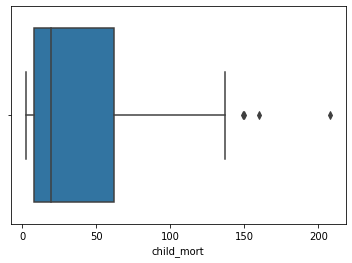

In [11]:
sns.boxplot("child_mort", data = num_df)

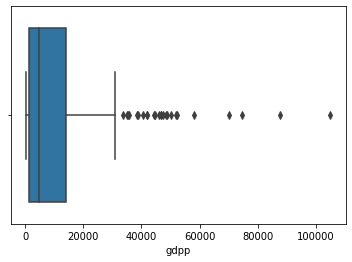

In [12]:
sns.boxplot("gdpp", data = num_df)

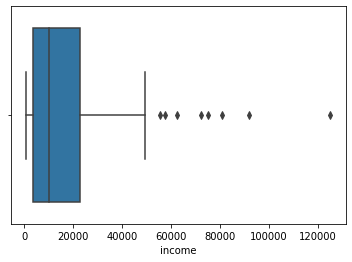

In [13]:
sns.boxplot("income", data = num_df)

This shows the presence of outlier in almost every column of the dataset. Lets get into the details and see the percentile values.

In [14]:
num_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [15]:
Q1 = num_df.quantile(0.05)
Q3 = num_df.quantile(0.95)
IQR = Q3 - Q1
print(IQR)

child_mort      112.54000
exports       31314.63120
health         4939.98508
imports       24072.27900
income        47077.00000
inflation        20.68660
life_expec       25.62000
total_fer         4.47100
gdpp          48144.10000
dtype: float64


In [16]:
num_df1 = num_df[~((num_df < (Q1 - 1.5 * IQR)) |(num_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
num_df1.shape

(163, 9)

After doing the outlier analysis we found that there are differences in IQR value and the max value for every column, indicating presence of outlier. After removing the outliers, we have only lost 4 rows hence, the outlier treatment is justified as we have not sacrificed any substantial information from the dataset.

In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(num_df1)
df_scaled

array([[ 1.30346558, -0.61761722, -0.5620229 , ..., -1.61238099,
         1.91131511, -0.70245521],
       [-0.54578122, -0.49689676, -0.43120409, ...,  0.66638867,
        -0.87033099, -0.48361951],
       [-0.27693692, -0.43404548, -0.47862366, ...,  0.689063  ,
        -0.04317483, -0.46072745],
       ...,
       [-0.37743946, -0.51927086, -0.53441704, ...,  0.30359947,
        -0.67021256, -0.6556193 ],
       [ 0.45170652, -0.58021259, -0.54700584, ..., -0.33128163,
         1.14419449, -0.6556193 ],
       [ 1.12507357, -0.5639083 , -0.53650688, ..., -2.08854181,
         1.63114932, -0.64633873]])

In [19]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [20]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [21]:
#List of PCA components.
pca.components_

array([[-0.30698428,  0.36360862,  0.35765024,  0.36956682,  0.37409574,
        -0.15167333,  0.33453424, -0.29199051,  0.38591716],
       [ 0.51615625,  0.31577145,  0.26181863,  0.27417341,  0.12071875,
         0.0755424 , -0.39447983,  0.50457263,  0.24426115],
       [-0.11002365,  0.06608226, -0.06888596, -0.03445985,  0.20413194,
         0.96056568,  0.11005041,  0.0028528 ,  0.03346145],
       [ 0.02242295, -0.49457432,  0.59468911, -0.46835452,  0.03495056,
         0.02383563,  0.16087345,  0.17651624,  0.35079116],
       [ 0.22424908, -0.09605826,  0.05175913, -0.1778861 ,  0.2987636 ,
         0.03137184, -0.58328247, -0.68187063,  0.10369577],
       [ 0.05240946, -0.02328102, -0.43013634, -0.29937657,  0.76091377,
        -0.21241085,  0.12953054,  0.28334395,  0.02995917],
       [ 0.75727112, -0.00187263, -0.05090905,  0.03359657, -0.04993945,
         0.03081609,  0.57982829, -0.28572785, -0.03913646],
       [ 0.01119169, -0.1093388 ,  0.46880607,  0.16126166,  0

In [22]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([0.63968856, 0.16072792, 0.10237182, 0.03755633, 0.02579765,
       0.02136698, 0.00940276, 0.00187125, 0.00121673])

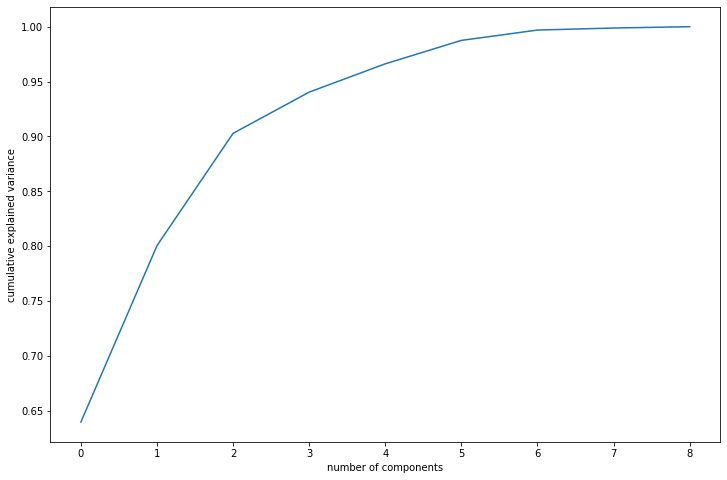

In [23]:
#Plotting the scree plot
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Around 96% of the information is being explained by 4 components.

In [24]:
colnames = list(num_df1.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4': pca.components_[3]})
pcs_df

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.306984,0.516156,-0.110024,0.022423
1,exports,0.363609,0.315771,0.066082,-0.494574
2,health,0.357650,0.261819,-0.068886,0.594689
3,imports,0.369567,0.274173,-0.034460,-0.468355
4,income,0.374096,0.120719,0.204132,0.034951
5,inflation,-0.151673,0.075542,0.960566,0.023836
6,life_expec,0.334534,-0.394480,0.110050,0.160873
7,total_fer,-0.291991,0.504573,0.002853,0.176516
8,gdpp,0.385917,0.244261,0.033461,0.350791


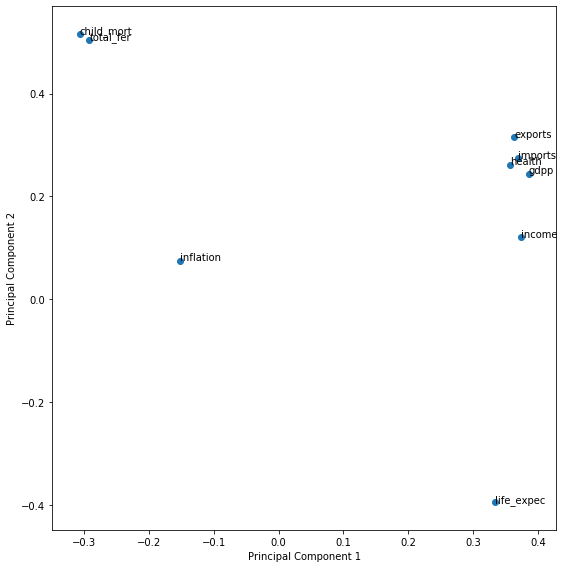

In [25]:
# Let's plot them to visualise how these features are loaded
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [26]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [27]:
df_scaled_pca = pca_final.fit_transform(df_scaled)

In [28]:
df_scaled_pca.shape

(163, 4)

In [29]:
df_scaled_pca[:5]

array([[-2.81146808,  1.4960077 , -0.21673624,  0.19855888],
       [-0.11432857, -1.55971933, -0.30842201, -0.04197815],
       [-0.60905342, -0.88069651,  1.20896881,  0.26977417],
       [-2.88255998,  2.14695589,  1.47890631,  0.31797147],
       [ 0.85580959, -0.92986734, -0.54115573, -0.13017252]])

In [30]:
corrmat = np.corrcoef(df_scaled_pca.transpose())

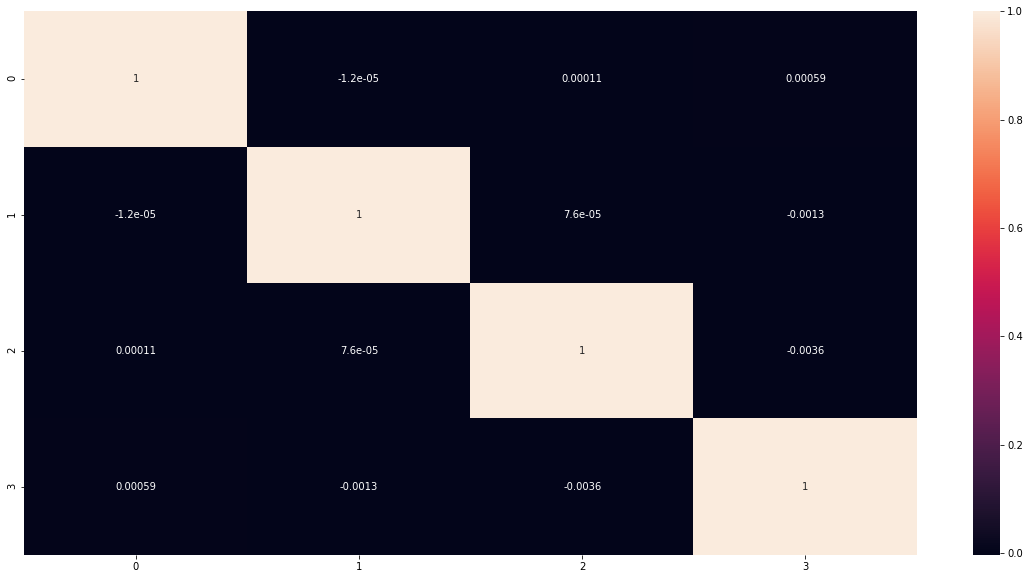

In [31]:
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [32]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min())
# we see that correlations are indeed very close to 0

max corr: 0.0005889773668501446 , min corr:  -0.0036000618799996924


We have effectively removed multicollinearity from our situation, and our models will be much more stable

In [33]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [34]:
df_scaled_pca = pd.DataFrame(df_scaled_pca)
df_scaled_pca.columns = ["PC1","PC2","PC3","PC4"]

In [35]:
hopkins(df_scaled_pca)

0.7680030380885564

In [36]:
df_scaled_pca.head()

,PC1,PC2,PC3,PC4
0,-2.811468,1.496008,-0.216736,0.198559
1,-0.114329,-1.559719,-0.308422,-0.041978
2,-0.609053,-0.880697,1.208969,0.269774
3,-2.882560,2.146956,1.478906,0.317971
4,0.855810,-0.929867,-0.541156,-0.130173


In [37]:
df_scaled_pca.shape

(163, 4)

### K-Mean Clustering

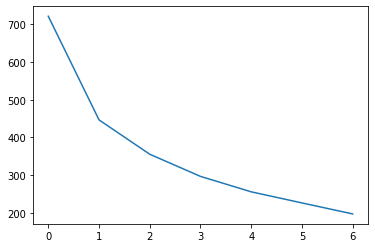

In [38]:
# Elbow Curve/SSD (sum of squared distance) method
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=num_cluster, max_iter=50)
    kmeans.fit(df_scaled_pca)
    ssd.append(kmeans.inertia_)
# Plot the SSDs for each n_cluster
plt.plot(ssd)

In [39]:
range_n_clusters = [2,3,4,5,6,7,8]
for num_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=num_cluster, max_iter=50)
    kmeans.fit(df_scaled_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_scaled_pca, cluster_labels)
    
    print("For n_Cluster = {0}, the silhouette score is {1}".format(num_cluster, silhouette_avg))

For n_Cluster = 2, the silhouette score is 0.5001434295090367
For n_Cluster = 3, the silhouette score is 0.4303998560697302
For n_Cluster = 4, the silhouette score is 0.41661029918403775
For n_Cluster = 5, the silhouette score is 0.39110598085321535
For n_Cluster = 6, the silhouette score is 0.33833331557117274
For n_Cluster = 7, the silhouette score is 0.3264393423366287
For n_Cluster = 8, the silhouette score is 0.37205552876517084


In [40]:
# Final Model with K = 3
kmeans = KMeans(n_clusters = 3, max_iter = 50)
kmeans.fit(df_scaled_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1,
       2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [42]:
df_scaled_pca["ClusterID"] = kmeans.labels_
df_scaled_pca

,PC1,PC2,PC3,PC4,ClusterID
0,-2.811468,1.496008,-0.216736,0.198559,2
1,-0.114329,-1.559719,-0.308422,-0.041978,0
2,-0.609053,-0.880697,1.208969,0.269774,0
3,-2.882560,2.146956,1.478906,0.317971,2
4,0.855810,-0.929867,-0.541156,-0.130173,0
5,-0.101144,-0.894982,1.907409,0.356097,0
6,-0.481541,-1.452504,0.024152,-0.099472,0
7,3.765299,0.337927,-0.246863,1.215471,1
8,4.978645,1.157367,-0.292312,0.187589,1
9,-0.558154,-0.633744,0.825149,-0.381376,0


In [43]:
df_scaled_pca['ClusterID'].value_counts()

0    89
2    47
1    27
Name: ClusterID, dtype: int64

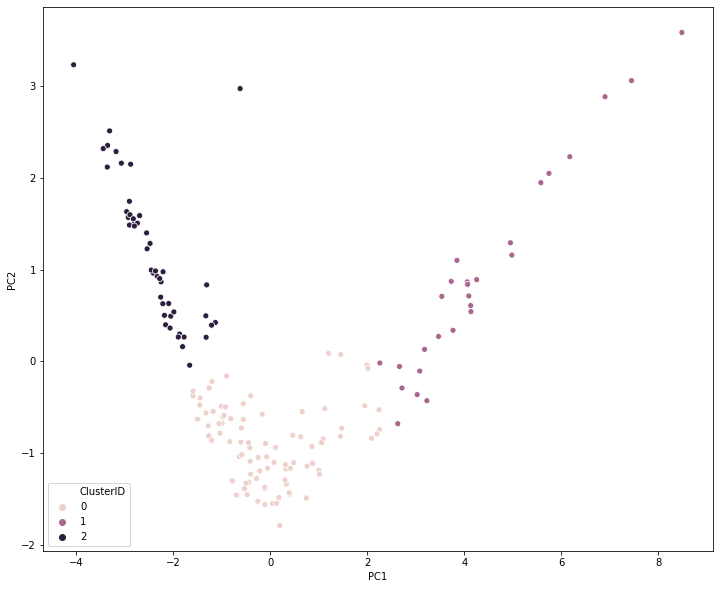

In [44]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=df_scaled_pca)

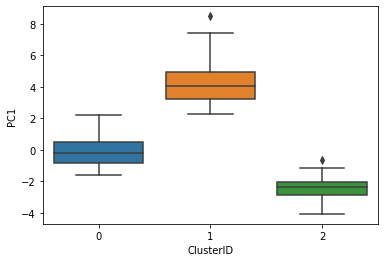

In [45]:
sns.boxplot(x="ClusterID", y="PC1", data = df_scaled_pca)

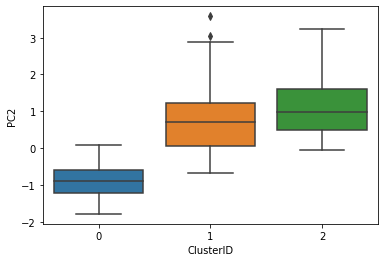

In [46]:
sns.boxplot(x="ClusterID", y="PC2", data = df_scaled_pca)

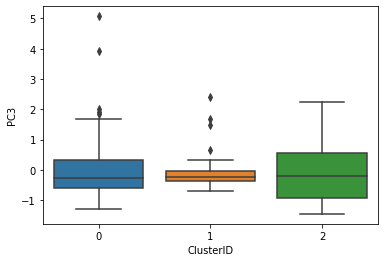

In [47]:
sns.boxplot(x="ClusterID", y="PC3", data = df_scaled_pca)

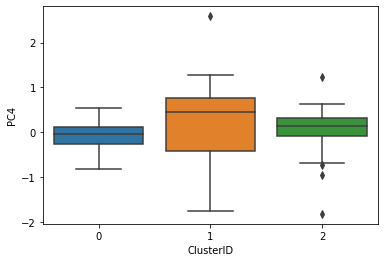

In [48]:
sns.boxplot(x="ClusterID", y="PC4", data = df_scaled_pca)

### Hiererchical Clustering

In [49]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree

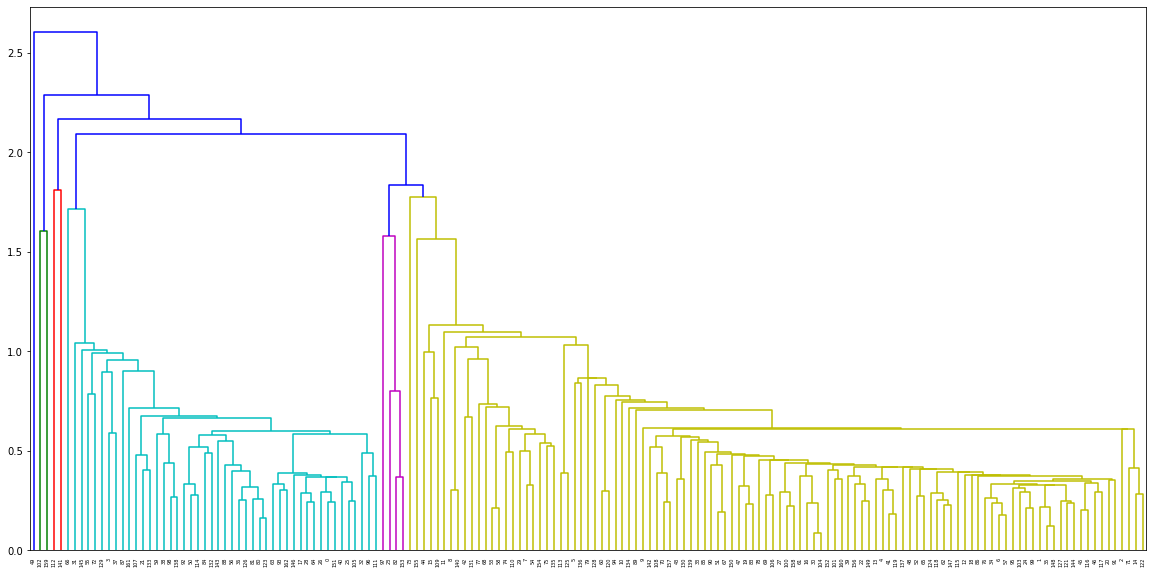

In [50]:
plt.figure(figsize=(20,10))
mergings = linkage(df_scaled_pca, method="single", metric="euclidean")
dendrogram(mergings)
plt.show()

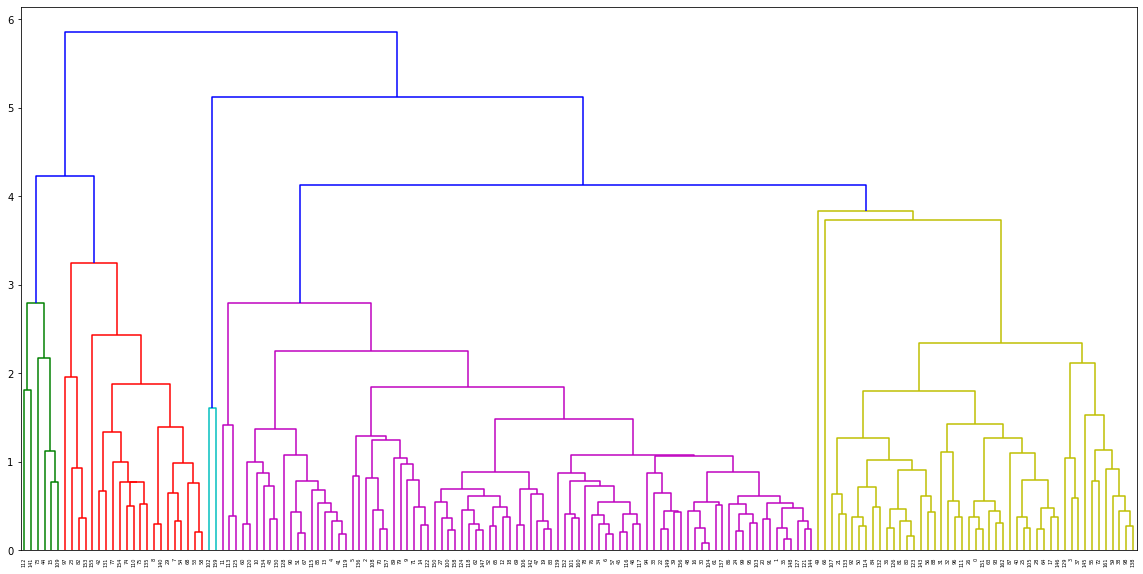

In [51]:
plt.figure(figsize=(20,10))
mergings_average = linkage(df_scaled_pca, method="average",metric="euclidean")
dendrogram(mergings_average)
plt.show()

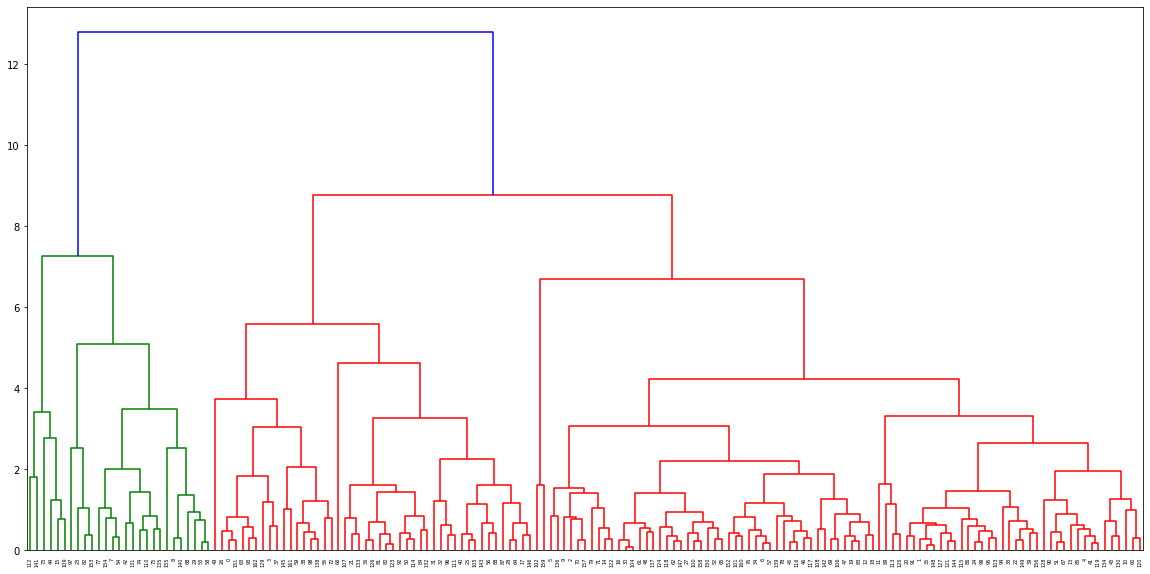

In [52]:
plt.figure(figsize=(20,10))
mergings_complete = linkage(df_scaled_pca, method="complete", metric="euclidean")
dendrogram(mergings_complete)
plt.show()

In [53]:
cluster_labels = cut_tree(mergings_complete,n_clusters=3).reshape(-1, )

In [54]:
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2,
       0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 0, 0])

In [55]:
df_scaled_pca["Cluster_label"] = cluster_labels
df_scaled_pca.head()

,PC1,PC2,PC3,PC4,ClusterID,Cluster_label
0,-2.811468,1.496008,-0.216736,0.198559,2,0
1,-0.114329,-1.559719,-0.308422,-0.041978,0,1
2,-0.609053,-0.880697,1.208969,0.269774,0,1
3,-2.882560,2.146956,1.478906,0.317971,2,0
4,0.855810,-0.929867,-0.541156,-0.130173,0,1


In [56]:
df_scaled_pca['Cluster_label'].value_counts()

1    89
0    47
2    27
Name: Cluster_label, dtype: int64

In [57]:
df_scaled_pca.shape

(163, 6)

In [58]:
num_df1.shape

(163, 9)

In [59]:
df2 = pd.merge(df,df_scaled_pca,left_index=True,right_index=True,how='inner')

In [60]:
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID,Cluster_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.811468,1.496008,-0.216736,0.198559,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.114329,-1.559719,-0.308422,-0.041978,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.609053,-0.880697,1.208969,0.269774,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.882560,2.146956,1.478906,0.317971,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.855810,-0.929867,-0.541156,-0.130173,0,1


In [61]:
df2.isnull().sum()

country          0
child_mort       0
exports          0
health           0
imports          0
income           0
inflation        0
life_expec       0
total_fer        0
gdpp             0
PC1              0
PC2              0
PC3              0
PC4              0
ClusterID        0
Cluster_label    0
dtype: int64

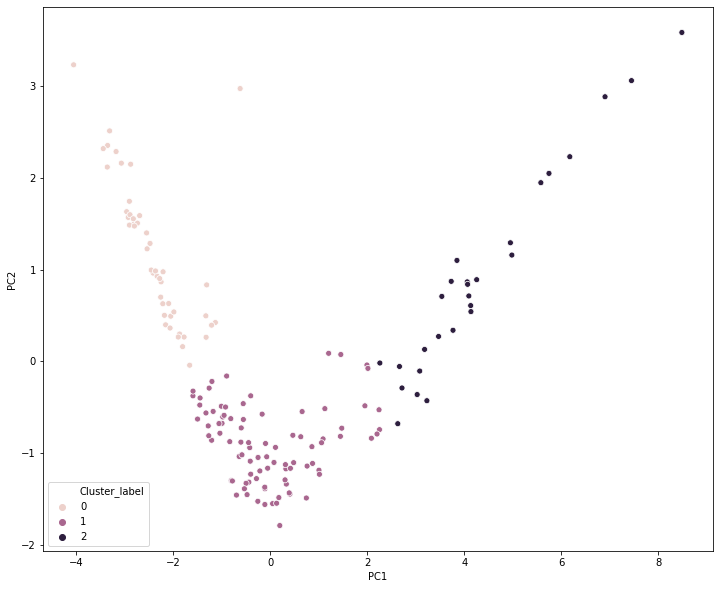

In [62]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='PC1',y='PC2',hue='Cluster_label',legend='full',data=df2)

In [63]:
df3 = df2.drop(['PC1','PC2','PC3','PC4'], axis=1)

In [64]:
df3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Cluster_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,1


### Analysis of the clusters

In [65]:
clu_childmort = pd.DataFrame(df3.groupby(["Cluster_label"]).child_mort.mean())
clu_gdpp = pd.DataFrame(df3.groupby(["Cluster_label"]).gdpp.mean())
clu_income = pd.DataFrame(df3.groupby(["Cluster_label"]).income.mean())

In [66]:
df4 = pd.concat([pd.Series([0,1,2]),clu_childmort,clu_gdpp,clu_income], axis=1)
df4

,0,child_mort,gdpp,income
0,0,69.874468,9581.680851,12682.361702
1,1,26.133708,10144.629213,15593.348315
2,2,22.270370,29415.666667,31501.259259


In [67]:
df4.columns = ['cluster_label','child_mort','gdpp','income']
df4

,cluster_label,child_mort,gdpp,income
0,0,69.874468,9581.680851,12682.361702
1,1,26.133708,10144.629213,15593.348315
2,2,22.270370,29415.666667,31501.259259


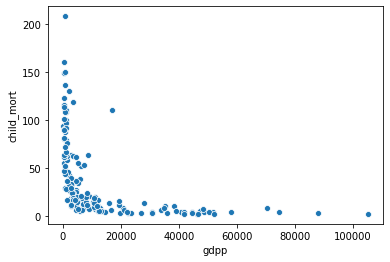

In [68]:
sns.scatterplot(x='gdpp',y='child_mort',data=df3)

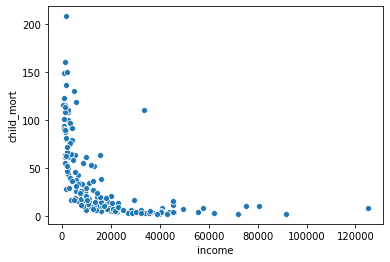

In [69]:
sns.scatterplot(x='income',y='child_mort',data=df3)

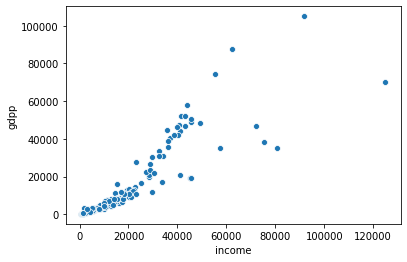

In [70]:
sns.scatterplot(x='income',y='gdpp',data=df3)

### Binning

In [71]:
fin=df3[df3['child_mort']>=69.874468]
fin=fin[fin['income']<= 12682.361702]
fin1=fin[fin['gdpp']<= 581.680851]

In [74]:
fin1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Cluster_label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575,2,0
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2,0
56,Gambia,80.3,133.7560,31.9778,239.974,1660,4.30,65.5,5.71,562,2,0
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,2,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,0,1
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,0,1


In [72]:
## Countries with urgent need of Finacial Aid falls under cluster_label 0 having very high mean child_mortality rate, very poor mean gdpp and mean income.
fin1.nsmallest(5,'income')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Cluster_label
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2,0
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,1,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2,0


In [73]:
fin1.nlargest(5,'child_mort')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Cluster_label
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,2,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,2,0
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,1,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,2,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,2,0
